In [1]:
#-------------------------------------------------------------------------
#   inuvik_Si_pore.m
#
#   Generates SFC look up table data for Inuvik soil for arbitrary porosity
#   using original data from Andersland and Ladanyi, with the conventions
#   of Rempel 2008 and Sizemore et al. 2015.
#
#   Based on soil_property_plots.m, which generates figures 3-5 of Sizemore
#   et al. 2015.
#
#   Note: Porosity phi should be entered as a decimal number (e.g., 35% -->
#   0.35).
#
#   Hanna Sizemore 25 January 2024
#-------------------------------------------------------------------------

# Adapted to python

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def inuvik_Si_pore(phi):
    alpha_AL = 14.5  # Inuvik alpha, Andersland & Ladanyi convention
    beta_AL = -0.254  # Inuvik beta, Andersland & Ladanyi convention

    alpha_hgs = -5 * beta_AL  # Rempel/Sizemore convention
    beta_hgs = -beta_AL  # Rempel/Sizemore convention

    # Calculate the porosity dependent freezing point depression
    tmtf = (alpha_AL * (1 - phi) * 2.65 / phi / 100) ** (-1 / beta_AL)
    print(tmtf)

    # Generate temperature, T, and undercooling, theta, & ice fraction, Si, arrays
    T = list(range(75, 276))  # [K]
    theta = [0] * len(T)  # [unitless]
    Si = [0] * len(T)  # [unitless]

    print('  T     theta       Si')
    rows=[]
    for i in range(len(T)):
        theta[i] = (273.15 - tmtf - T[i]) / tmtf
        Si[i] = sival(theta[i], -beta_hgs)
        x = [T[i], theta[i], Si[i]]
        rows.append(x)
        print(x)

    return rows


# Return ice saturation given undercooling
def sival(theta, beta):
    temptest = (theta > 1)  # sival should equal zero for T > Tf (theta <= 1)
    sival = 1 - theta ** beta
    sival = sival * temptest
    return sival


In [11]:
sfc = inuvik_Si_pore(0.35)

0.26489128561085595
  T     theta       Si
[75, 747.042728333073, 0.8137182721551087]
[76, 743.2675947053511, 0.813478405444857]
[77, 739.4924610776294, 0.8132370060899291]
[78, 735.7173274499075, 0.8129940563978495]
[79, 731.9421938221858, 0.8127495383797757]
[80, 728.167060194464, 0.8125034337439738]
[81, 724.3919265667422, 0.8122557238891179]
[82, 720.6167929390205, 0.8120063898974025]
[83, 716.8416593112986, 0.8117554125274674]
[84, 713.0665256835769, 0.8115027722071245]
[85, 709.291392055855, 0.8112484490258822]
[86, 705.5162584281333, 0.8109924227272601]
[87, 701.7411248004115, 0.8107346727008867]
[88, 697.9659911726897, 0.810475177974373]
[89, 694.1908575449679, 0.8102139172049544]
[90, 690.415723917246, 0.8099508686708936]
[91, 686.6405902895243, 0.8096860102626343]
[92, 682.8654566618025, 0.8094193194736998]
[93, 679.0903230340807, 0.8091507733913257]
[94, 675.315189406359, 0.8088803486868177]
[95, 671.5400557786371, 0.8086080216056265]
[96, 667.7649221509154, 0.80833376795712

[75, 747.042728333073, 0.8137182721551087]
[76, 743.2675947053511, 0.813478405444857]
[77, 739.4924610776294, 0.8132370060899291]
[78, 735.7173274499075, 0.8129940563978495]
[79, 731.9421938221858, 0.8127495383797757]
[80, 728.167060194464, 0.8125034337439738]
[81, 724.3919265667422, 0.8122557238891179]
[82, 720.6167929390205, 0.8120063898974025]
[83, 716.8416593112986, 0.8117554125274674]
[84, 713.0665256835769, 0.8115027722071245]
[85, 709.291392055855, 0.8112484490258822]
[86, 705.5162584281333, 0.8109924227272601]
[87, 701.7411248004115, 0.8107346727008867]
[88, 697.9659911726897, 0.810475177974373]
[89, 694.1908575449679, 0.8102139172049544]
[90, 690.415723917246, 0.8099508686708936]
[91, 686.6405902895243, 0.8096860102626343]
[92, 682.8654566618025, 0.8094193194736998]
[93, 679.0903230340807, 0.8091507733913257]
[94, 675.315189406359, 0.8088803486868177]
[95, 671.5400557786371, 0.8086080216056265]
[96, 667.7649221509154, 0.8083337679571267]
[97, 663.9897885231935, 0.8080575631040

/Users/alexiakubas/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


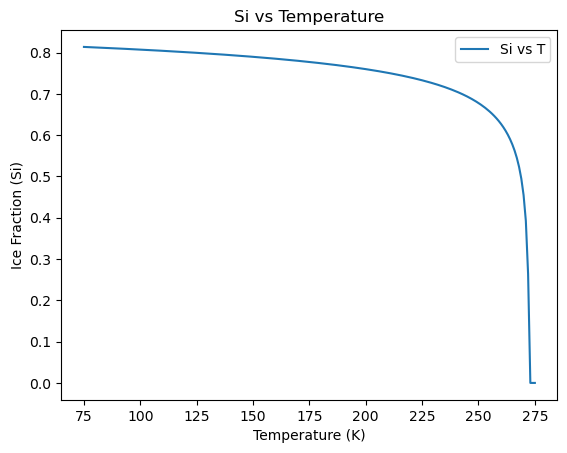

In [15]:
for row in sfc:
    print(row)

# Plotting x[2] (Si) against x[0] (T)
plt.plot([row[0] for row in sfc], [row[2] for row in sfc], label='Si vs T')
plt.xlabel('Temperature (K)')
plt.ylabel('Ice Fraction (Si)')
plt.title('Si vs Temperature')
plt.legend()
plt.show()

In [17]:
# Use these functions for SFC equation from Sizemore et al. (2015)
T_f = 0.26489128561085595 #0.35 porosity
beta = 0.254

def calculate_fw_Siz(T, T_f, beta):
    if T >= 273.15-T_f:
        return 1.0  # Water is fully liquid
    else:
        return (T_f / (273.15 - T)) ** beta

In [19]:
T = list(range(75, 276))
fw = np.zeros(len(T))

for i in range(len(T)):
    fw[i] = calculate_fw_Siz(T[i], T_f, beta)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

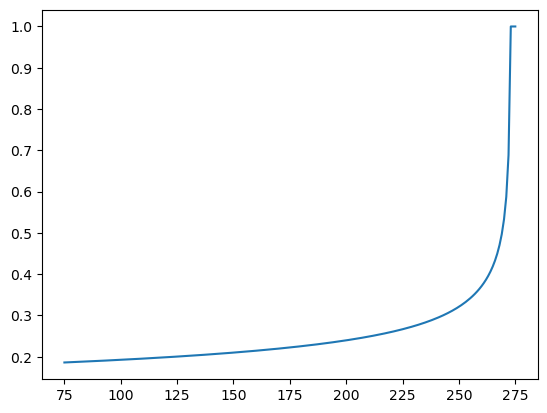

In [33]:
m=fw[-11] / (265-240)
plt.plot(T, fw)
plt.plot(T, m*T-m*265+fw[-11])
plt.xlim(235,273.15)

In [21]:
T[-15]

261

In [24]:
T[-11]

265

In [25]:
fw[-11]

0.41881782379796945

In [28]:
m=fw[-11] / (265-240)


0.01675271295191878

/var/folders/q6/f8_x77hj45d1kngmhhrc3k9r0000gn/T/ipykernel_11286/3602009726.py:5: RuntimeWarning: invalid value encountered in power
  plt.plot(test_temps[1650:1732], (T_f / ((273.15-T_f) - test_temps[1650:1732])) ** beta, c='purple')


(235.0, 273.15)

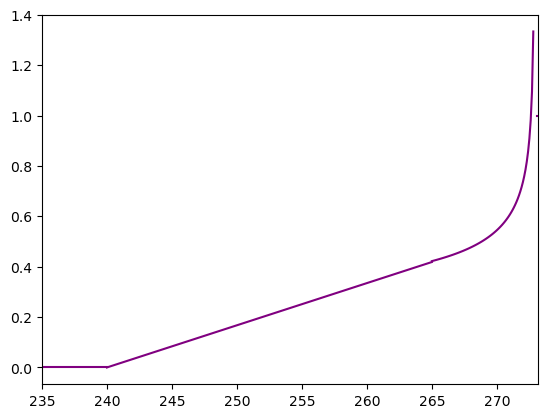

In [38]:
test_temps = np.arange(100,300.1,.1)

plt.plot(test_temps[0:1401], np.zeros(len(test_temps[0:1401])), c='purple', label=r'Inuvik Clay SFC from Sizemore et al. (2015), $\phi = 0.35$ ')
plt.plot(test_temps[1400:1651], 0.01675271295191878*test_temps[1400:1651]-0.01675271295191878*265+0.41881782379796945, c='purple')
plt.plot(test_temps[1650:1732], (T_f / ((273.15-T_f) - test_temps[1650:1732])) ** beta, c='purple')
plt.plot(test_temps[1731:], np.ones(len(test_temps[1731:])), c='purple')
plt.xlim(235,273.15)